In [ ]:
from google.colab import drive
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
import matplotlib.pyplot as plt

drive.mount('/content/gdrive')

Mounted at /content/gdrive


(256, 256)


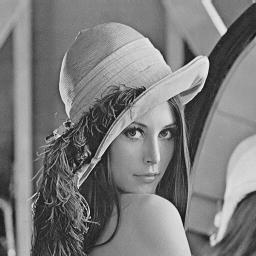

In [ ]:
img = cv2.imread('/content/gdrive/My Drive/ColabIP/Images/lena256.jpg')
RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

gImg = cv2.cvtColor(RGB_img, cv2.COLOR_RGB2GRAY)
print(gImg.shape)
#plt.imshow(gImg, cmap='gray')
cv2_imshow(gImg)

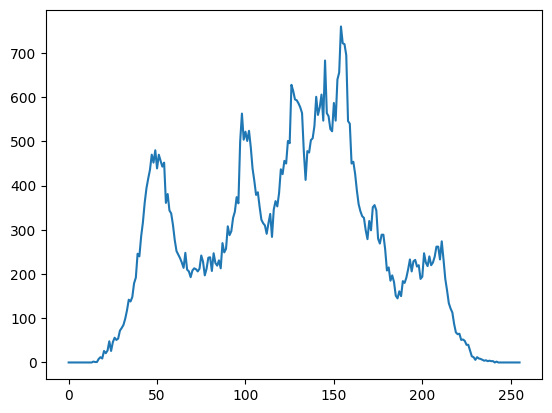

In [ ]:
hist = cv2.calcHist([gImg], [0], None, [256], [0, 256])
plt.plot(hist)

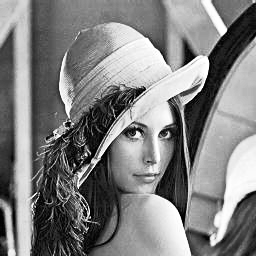

In [ ]:
gOut = cv2.equalizeHist(gImg) #이퀄라이징
cv2_imshow(gOut)

(256, 1)


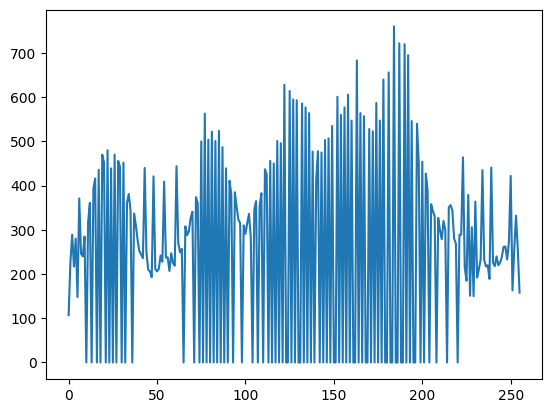

In [ ]:
hist = cv2.calcHist([gOut], [0], None, [256], [0, 256])
plt.plot(hist)
print(hist.shape) #(256, 1)

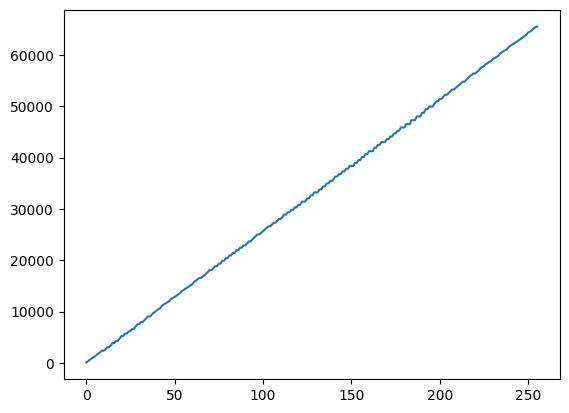

In [ ]:
#위 히스토그램을 누적시킨 것

cumulHist = hist.copy() #누적 히스토그램

for i in range(1, 256):
  cumulHist[i] = cumulHist[i-1] + hist[i]

plt.plot(cumulHist)

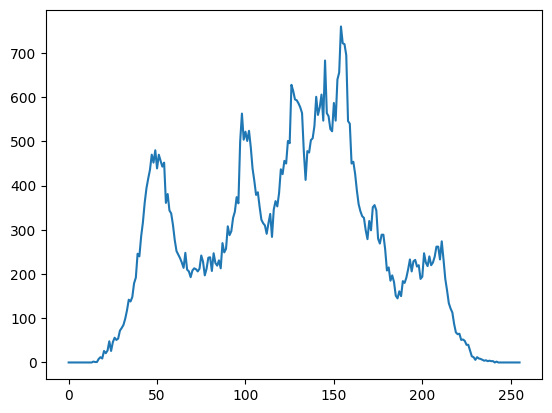

In [ ]:
#원래 이미지(gImg)의 히스토그램

hist = cv2.calcHist([gImg], [0], None, [256], [0, 256])
plt.plot(hist)

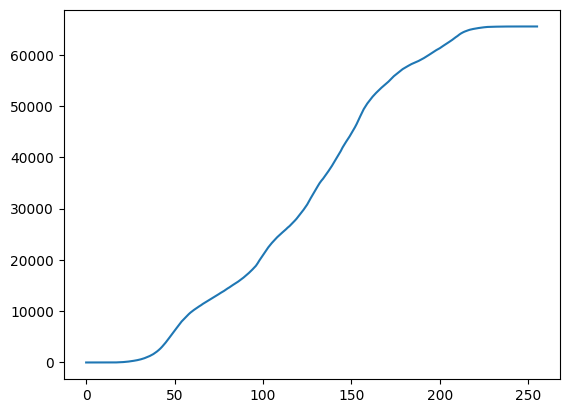

In [ ]:
cumulHist = hist.copy() #누적 히스토그램

for i in range(1, 256):
  cumulHist[i] = cumulHist[i-1] + hist[i]

plt.plot(cumulHist)

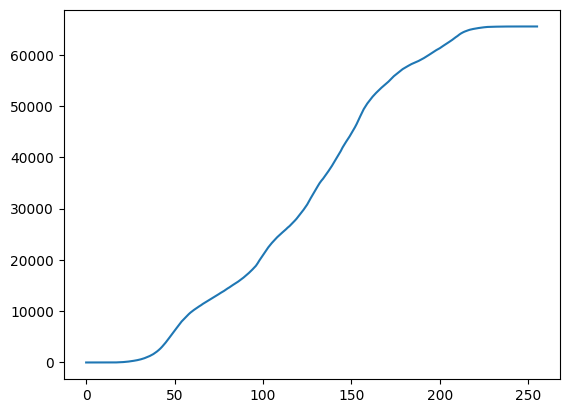

In [ ]:
#위 gImg 누적 히스토그램을 직선형태로 만들어야 함

equalHist = cumulHist.copy()
numOfPixels = np.int32(gImg.shape[0] * gImg.shape[1]) #N으로 나눠주는 것 (N = numOfPixels)
equalHIst = equalHIst / numOfPixels

plt.plot(equalHist)

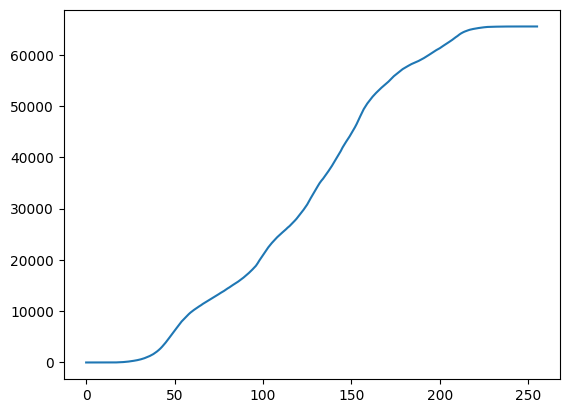

In [ ]:
equalHIst = equalHist * 255

plt.plot(equalHist)

<ipython-input-12-672a6b373e12>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  gOut[h, w] = equalHist[gImg[h, w]]


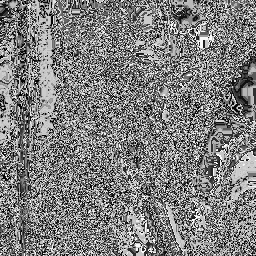

In [ ]:
gOut = gImg.copy()

for h in range(gImg.shape[0]):
  for w in range(gImg.shape[1]):
    gOut[h, w] = equalHist[gImg[h, w]]

cv2_imshow(gOut)

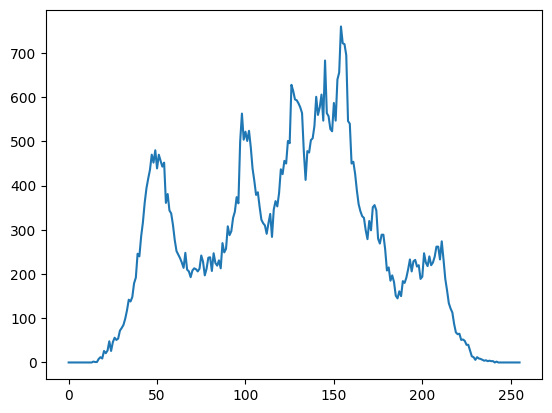

In [ ]:
hist = cv2.calcHist([gImg], [0], None, [256], [0, 256])
plt.plot(hist)

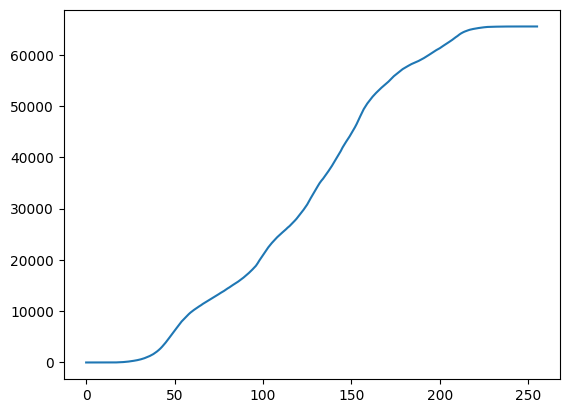

In [ ]:
cumulHist = hist.copy() #누적 히스토그램

for i in range(1, 256):
  cumulHist[i] = cumulHist[i-1] + hist[i]

plt.plot(cumulHist)